In [1]:
import json
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

# Make plots a bit bigger
plt.rcParams["figure.figsize"] = (8, 5)

# Path to results.json (adjust if needed)
DATA_PATH = Path("results.json")

with DATA_PATH.open("r", encoding="utf-8") as f:
    raw = json.load(f)

raw.keys()

dict_keys(['Pythagorean_theorem', 'Golden_ratio', 'Fibonacci_sequence', 'Eigenvalues_and_eigenvectors', 'Taylor_series', 'Group_mathematics', 'Riemann_hypothesis', 'Fourier_transform', 'Tensor_product', 'Derivative', 'Neural_network_machine_learning', 'Integral', 'Arch_Linux', 'Machine_learning', 'Financial_crisis_2008', 'Investment_banking', 'Tax', 'Divergence', 'Vector_space', 'Artificial_intelligence'])

In [2]:
# Convert the nested JSON into a flat table of (article, criterion, score)
rows = []

for article, info in raw.items():
    criteria = info.get("criteria", {})
    total_score = info.get("total_score", None)
    for crit_name, crit_data in criteria.items():
        rows.append(
            {
                "article": article,
                "criterion": crit_name,
                "score": crit_data.get("score", None),
                "reason": crit_data.get("reason", ""),
                "total_score": total_score,
            }
        )

df = pd.DataFrame(rows)
df.head()

,article,criterion,score,reason,total_score
0,Pythagorean_theorem,Engaging Introduction,3,The article begins with a clear statement of w...,36
1,Pythagorean_theorem,Real-World Relevance,4,The article mentions consequences like Euclide...,36
2,Pythagorean_theorem,Motivating Examples,2,"There are few concrete, real-life example prob...",36
3,Pythagorean_theorem,Visual & Symbolic Support,4,The article includes the standard symbolic equ...,36
4,Pythagorean_theorem,Gradual Progression,3,The article is organized into sections (proofs...,36


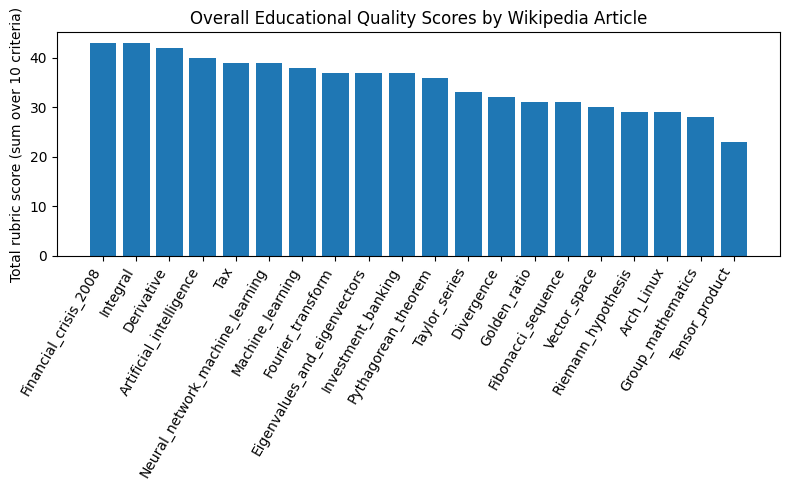

In [3]:
article_totals = (
    df[["article", "total_score"]]
    .drop_duplicates()
    .sort_values("total_score", ascending=False)
)

plt.figure()
plt.bar(range(len(article_totals)), article_totals["total_score"])
plt.xticks(
    range(len(article_totals)),
    article_totals["article"],
    rotation=60,
    ha="right"
)
plt.ylabel("Total rubric score (sum over 10 criteria)")
plt.title("Overall Educational Quality Scores by Wikipedia Article")
plt.tight_layout()
plt.show()

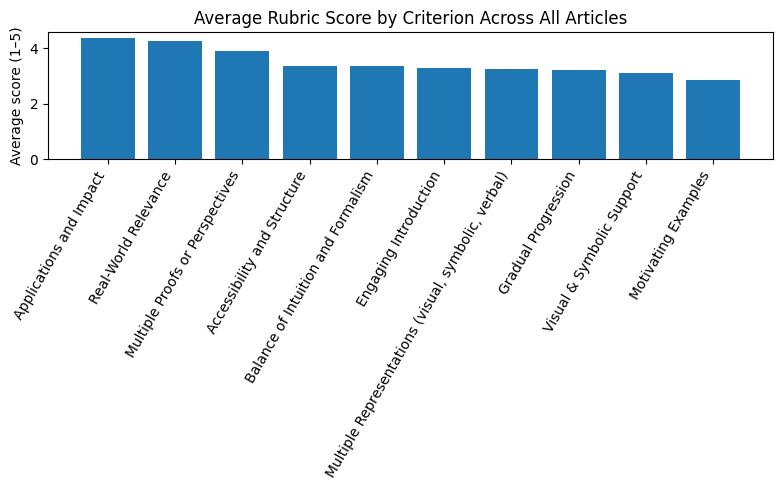

,criterion,score
0,Applications and Impact,4.35
1,Real-World Relevance,4.25
2,Multiple Proofs or Perspectives,3.90
3,Accessibility and Structure,3.35
4,Balance of Intuition and Formalism,3.35
5,Engaging Introduction,3.30
6,"Multiple Representations (visual, symbolic, ve...",3.25
7,Gradual Progression,3.20
8,Visual & Symbolic Support,3.10
9,Motivating Examples,2.85


In [4]:
crit_means = (
    df.groupby("criterion")["score"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure()
plt.bar(range(len(crit_means)), crit_means["score"])
plt.xticks(
    range(len(crit_means)),
    crit_means["criterion"],
    rotation=60,
    ha="right"
)
plt.ylabel("Average score (1–5)")
plt.title("Average Rubric Score by Criterion Across All Articles")
plt.tight_layout()
plt.show()

crit_means

<Figure size 800x500 with 0 Axes>

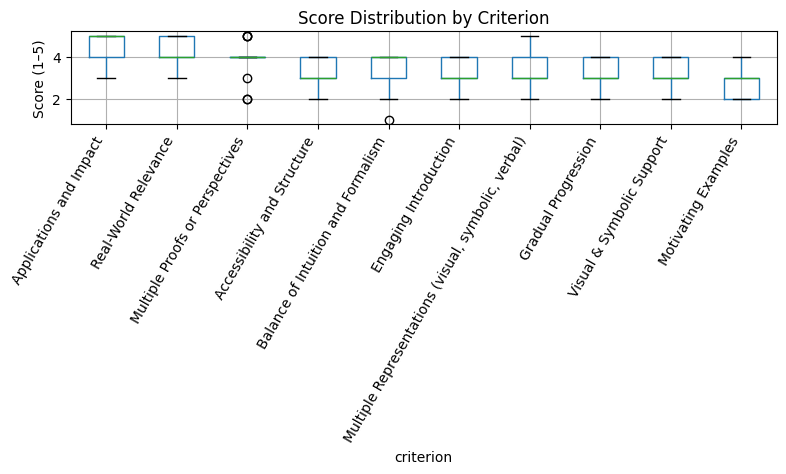

In [5]:
# Ensure criteria are ordered by mean score for nicer plotting
ordered_criteria = crit_means["criterion"].tolist()
df["criterion"] = pd.Categorical(df["criterion"], categories=ordered_criteria, ordered=True)

plt.figure()
df.boxplot(column="score", by="criterion")
plt.xticks(rotation=60, ha="right")
plt.ylabel("Score (1–5)")
plt.title("Score Distribution by Criterion")
plt.suptitle("")  # remove automatic suptitle
plt.tight_layout()
plt.show()

/var/folders/bs/ltbgvn7d12bf_qmhjn6jf0sm0000gp/T/ipykernel_34523/2431728941.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(


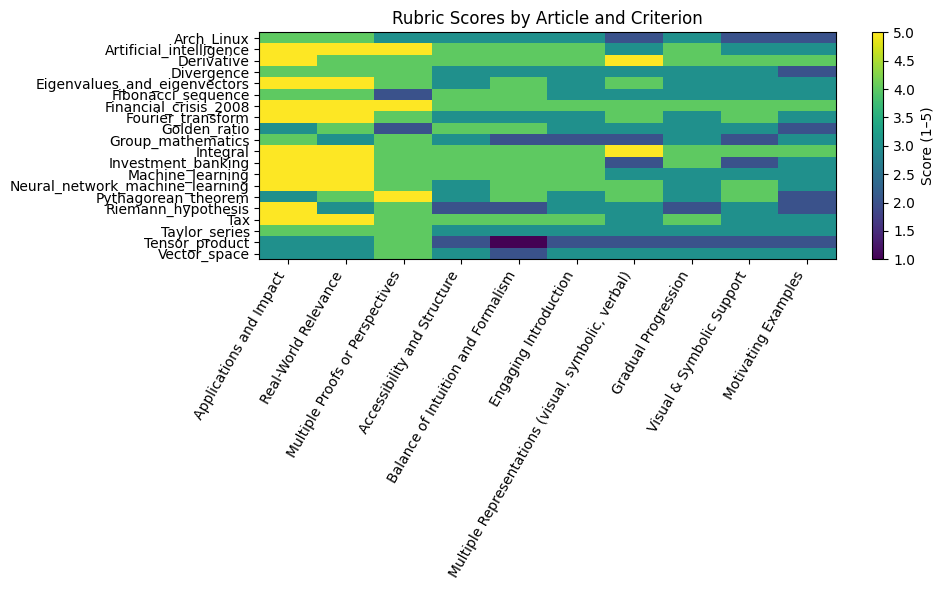

criterion,Applications and Impact,Real-World Relevance,Multiple Proofs or Perspectives,Accessibility and Structure,Balance of Intuition and Formalism,Engaging Introduction,"Multiple Representations (visual, symbolic, verbal)",Gradual Progression,Visual & Symbolic Support,Motivating Examples
article,,,,,,,,,,
Arch_Linux,4.0,4.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0
Artificial_intelligence,5.0,5.0,5.0,4.0,4.0,4.0,3.0,4.0,3.0,3.0
Derivative,5.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0
Divergence,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0
Eigenvalues_and_eigenvectors,5.0,5.0,4.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0
Fibonacci_sequence,4.0,4.0,2.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0
Financial_crisis_2008,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
Fourier_transform,5.0,5.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0
Golden_ratio,3.0,4.0,2.0,4.0,4.0,3.0,3.0,3.0,3.0,2.0


In [6]:
# Pivot to article x criterion matrix
pivot = df.pivot_table(
    index="article",
    columns="criterion",
    values="score"
)

plt.figure(figsize=(10, 6))
im = plt.imshow(pivot.values, aspect="auto")

plt.colorbar(im, label="Score (1–5)")
plt.xticks(range(len(pivot.columns)), pivot.columns, rotation=60, ha="right")
plt.yticks(range(len(pivot.index)), pivot.index)
plt.title("Rubric Scores by Article and Criterion")
plt.tight_layout()
plt.show()

pivot